In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import geopandas as gpd

In [3]:
pc4_gdf = gpd.read_file('./data/georef-netherlands-postcode-pc4.geojson')
pc4_gdf = pc4_gdf[["pc4_code", "geometry"]]

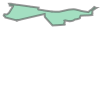

In [4]:
pc4_gdf

pc4_gdf.loc[0]['geometry']

In [5]:
target_pc4 = pc4_gdf[pc4_gdf["pc4_code"] == "5612"].geometry.iloc[0]

In [6]:
# Example usage:
query_params = [
    ("amenity", "parking"),           # All public & private lots
    ("amenity", "charging_station"),  # Existing EV chargers
    ("amenity", "fuel"),              # Gas stations (often pre-wired)
    ("shop", "supermarket"),          # High dwell-time retail
    ("shop", "convenience"),          # Convenience stores
    ("amenity", "restaurant"),        # Sit-down eateries
    ("amenity", "fast_food"),         # Quick meals
    ("amenity", "cafe"),              # Coffee shops
    ("amenity", "bus_station"),       # Major transit hub
    ("highway", "bus_stop"),          # Local transit stops

    # Optional extras you might add:
    ("amenity", "school"),            # Schools: parents drop-off/pick-up  
    ("amenity", "hospital"),          # Hospitals: staff & visitor parking  
    ("building", "office"),           # Office buildings: employee parking  
    ("landuse", "commercial"),        # Commercial zones: dense businesses  
    ("tourism", "attraction"),        # Tourist draws: museums, landmarks  
    ("leisure", "sports_centre"),     # Gyms, pools: medium dwell time  
]

In [7]:
from src.overpass_query import query_overpass_candidates
res = query_overpass_candidates(target_pc4, query_params)

In [8]:
print(res[res["amenity"] == "charging_station"].iloc[0].to_string())


addr:city                                            NaN
addr:housenumber                                     NaN
addr:postcode                                        NaN
addr:street                                          NaN
brand                                                NaN
brand:wikidata                                       NaN
brand:wikipedia                                      NaN
name                                                 NaN
opening_hours                                        NaN
phone                                                NaN
ref                                                  NaN
shop                                                 NaN
source                                               NaN
source:date                                          NaN
website                                              NaN
geometry                    POINT (5.4850265 51.4483194)
access                                               NaN
amenity                        

In [12]:
from src.ocm_query import get_charging_points_by_polygon

# Get POI list
df = get_charging_points_by_polygon(target_pc4, max_results=100)

Encoded polyline: km`yHezj`@zAqqD`JoTbSaHlJt|B`Rr`Aup@rjA{Myx@


In [13]:
df

,id,title,address,town,state,country,latitude,longitude,url,power_kw,num_points,geometry
0,62896,Pastoor Petersstraat 154,Pastoor Petersstraat 154,Eindhoven,None,159,51.444726,5.473026,http://www.ev-box.nl,"[11, 11]",1,POINT (5.47303 51.44473)
1,32883,Dominee Theodor Fliednerstraat 2,Dominee Theodor Fliednerstraat 2,Eindhoven,None,159,51.452816,5.489907,http://www.evnet.nl,[11],2,POINT (5.48991 51.45282)
2,32873,Horsten,Horsten,Eindhoven,None,159,51.449849,5.494540,http://www.ev-box.nl,"[11, 11]",1,POINT (5.49454 51.44985)
3,32864,De Zaale,De Zaale,Eindhoven,None,159,51.448140,5.489050,http://www.ev-box.nl,"[11, 11]",1,POINT (5.48905 51.44814)
4,32856,Den Dolech,Den Dolech,Eindhoven,None,159,51.448360,5.485070,http://www.ev-box.nl,"[11, 11]",1,POINT (5.48507 51.44836)
5,32854,De Wielen,De Wielen,Eindhoven,None,159,51.446819,5.488298,None,[2.3],1,POINT (5.4883 51.44682)
